# Notebook on doctrines on the question of a science of the soul

The doctrines have been registered in a more rigid manner than the doctrines on the process of self-knowledge, as the structure of the arguments of more closely reflected in the annotation. It has few consequences for the quantitative analyses, but there is one important difference. The structure means that the base doctrine *There can be a science of the soul* is registered in very many instances. As this doctrine is not particularly interesting in itself, it is disregarded in the analyses here and filtered out in every query. 

The inconsistency of the registration could be a weakness. Fortunately it is simple to adjust for this imbalance by adjust the queries slightly. 

# Setup and utility functions

In [2]:
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from os import path

from utilities import save_table, print_figure_inclusion, build_matrix

from py2neo import Graph
graph = Graph('https://hobby-ijiahihliahcgbkepnpggmbl.dbs.graphenedb.com:24780/db/data/',
              user='remote',
              password="b.WKJhDFo38DGT.XBFHkuTL7R6BEEgw")

sns.set_context("paper", font_scale=1.5)

#pd.set_option('display.max_colwidth', -1)

In [3]:
author_names = graph.run('MATCH (n:Author)--(:Text)--(:Question)--(:Instance)--(:DissertationPart {chapter:4}) RETURN distinct n.name ORDER BY n.name asc').to_data_frame()['n.name']

In [4]:
author_names

0                Anonymus Bazan
1           Anonymus Bernardini
2                Anonymus Giele
3     Anonymus Mertoniensis 275
4             Anonymus Oriel 33
5         Anonymus Steenberghen
6     Anonymus Vat. Lat. 2170 1
7     Anonymus Vat. Lat. 2170 2
8           Anonymus Vennebusch
9             Henric de la Wyle
10                John Dinsdale
11               John of Jandun
12              Radulphus Brito
13           Simon of Faversham
Name: n.name, dtype: object

## Quantities

In [5]:
# Number of doctrines
q = ("MATCH (d:Doctrine)--(:Instance)--(:DissertationPart {chapter:4}) "
     "WHERE NOT d.description = 'There can be a science of the soul' "
     "RETURN count(distinct d)")
total_doctrines = graph.run(q).evaluate()

# Number of instances
q = ("MATCH (i:Instance)--(:DissertationPart {chapter:4}) "
     "RETURN count(distinct i)")
total_instances = graph.run(q).evaluate()

# Number of conclusion doctrines
q = ("MATCH (:DissertationPart {chapter:4})--(i:Instance {type:'Conclusion'})-[:OF]->(d:Doctrine) "
     "WHERE NOT d.description = 'There can be a science of the soul' "
     "RETURN count(distinct d)")
conclusion_doctrines = graph.run(q).evaluate()

# Number of conclusion instances
q = ("MATCH (i:Instance)--(:DissertationPart {chapter:4}) "
     "RETURN count(distinct i)")
conclusion_instances =  graph.run(q).evaluate()

# Number of positive doctrines (doctrines with instances that are not in a rationes context)
q = ("MATCH (d:Doctrine)--(i:Instance)--(:DissertationPart {chapter:4}) "
     "WHERE not exists(i.type) "
     "AND NOT d.description = 'There can be a science of the soul' "
     "RETURN count(distinct d)")
positive_doctrines =  graph.run(q).evaluate()

# Number of instances of positive doctrines
q = ("MATCH (:DissertationPart {chapter:4})--(i:Instance)--(d:Doctrine) "
     "WHERE not exists(i.type) "
     "AND NOT d.description = 'There can be a science of the soul' "
     "RETURN count(distinct i)")
positive_instances =  graph.run(q).evaluate()

# Number of attacks doctrines
q = ("MATCH (:DissertationPart {chapter:4})--(i:Instance {type:'Negative ratio'})-[:OF]->(d:Doctrine) "
     "WHERE NOT d.description = 'There can be a science of the soul' "
     "RETURN count(distinct d)")
attack_doctrines = graph.run(q).evaluate()

# Number of attack instances
q = ("MATCH (:DissertationPart {chapter:4})--(i:Instance {type:'Negative ratio'}) "
     "RETURN count(i)")
attack_instances = graph.run(q).evaluate()

# Number of refutation doctrines
q = ("MATCH (:DissertationPart {chapter:4})--(i:Instance {type:'Refutation'})-[:OF]->(d:Doctrine) "
     "WHERE NOT d.description = 'There can be a science of the soul' "
     "RETURN count(distinct d)")
refutation_doctrines = graph.run(q).evaluate()

# Number of refutation instances
q = ("MATCH (:DissertationPart {chapter:4})--(i:Instance {type:'Refutation'}) "     
     "RETURN count(distinct i)")
refutation_instances = graph.run(q).evaluate()

In [6]:
quantities = {
    'All': [total_doctrines, total_instances, round(total_instances / total_doctrines, 2)],
    'Determination': [positive_doctrines, positive_instances, round(positive_instances / positive_doctrines, 2)],
    # 'Conclusions': [conclusion_doctrines, conclusion_instances, round(conclusion_doctrines / conclusion_instances, 2)],
    'Attack': [attack_doctrines, attack_instances, round(attack_instances / attack_doctrines, 2)],
    'Refutation': [refutation_doctrines, refutation_instances, round(refutation_instances / refutation_doctrines, 2)]
}
data = pd.DataFrame(quantities)
data.index = ['Doctrines', 'Instances', 'Proportion']
data.index.name = 'Context'
sum_table = data[['Determination', 'Attack', 'Refutation', 'All']].T
sum_table[['Doctrines', 'Instances']] = sum_table[['Doctrines', 'Instances']].astype(int)
sum_table

Context,Doctrines,Instances,Proportion
Determination,21,67,3.19
Attack,16,69,4.31
Refutation,18,63,3.50
All,47,213,4.53


In [7]:
save_table(
    filename='../thesis/data/tables/science-doctrines-instances.tex',
    table=sum_table.to_latex(),
    caption='Number of doctrines and instances in four different context classes.',
    label='tab:science:quantities:doctrines-instances'
)

Printed the following table to ../thesis/data/tables/science-doctrines-instances.tex:
\\begin{table}
\centering
\begin{tabular}{lrrr}
\toprule
Context &  Doctrines &  Instances &  Proportion \\
\midrule
Determination &         21 &         67 &        3.19 \\
Attack        &         16 &         69 &        4.31 \\
Refutation    &         18 &         63 &        3.50 \\
All           &         47 &        213 &        4.53 \\
\bottomrule
\end{tabular}
\caption{Number of doctrines and instances in four different context classes.}
\label{tab:science:quantities:doctrines-instances}
\end{table}


Notice that the "All" column is not the sum of the other columns, as one doctrine can easily be used for both attacking, refutating and as a general positive instance. The instance number is however identical with the sum of the columns "Positive", "Attacks", and "Refutations".

### Doctrines per commentator

In [8]:
# Doctrine count distributions
distributions = graph.run("match (a:Author)--(:Text)--(:Question)--(i:Instance)--(d:Doctrine) "
                          "WHERE (i)--(:DissertationPart {chapter:4})"
                          "AND NOT d.description = 'There can be a science of the soul' "
                          "return count(distinct d) as cnt, a.name order by cnt desc").to_data_frame()
distributions

,a.name,cnt
0,Henric de la Wyle,17
1,Anonymus Mertoniensis 275,16
2,John of Jandun,15
3,Anonymus Oriel 33,13
4,John Dinsdale,12
5,Anonymus Vat. Lat. 2170 1,11
6,Simon of Faversham,11
7,Radulphus Brito,10
8,Anonymus Bernardini,10
9,Anonymus Vennebusch,7


In [9]:
distributions.describe()

,cnt
count,14.000000
mean,10.285714
std,4.065399
min,5.000000
25%,6.250000
50%,10.500000
75%,12.750000
max,17.000000


### Instances of doctrines

In [10]:
# Doctrine count instance distributions
q = ("MATCH (:DissertationPart {chapter:4})--(i:Instance)-[:OF|SUPPORTS|ATTACKS]-(d:Doctrine) "
     "WHERE NOT d.description = 'There can be a science of the soul' "     
     "RETURN count(distinct i) as Count, d.description "
     "ORDER BY Count DESC")
instance_distributions = graph.run(q).to_data_frame()
instance_distributions

,Count,d.description
0,44,Soul not available to sense perception
1,30,Primary and secondary intelligibility
2,23,Substantial knowledge from accidents
3,21,Soul not intelligible to us
4,19,"Science about subject, parts or properties, pr..."
5,15,"Knowledge is continuous and temporal, but soul..."
6,13,Identity of mover and moved impossible
7,8,"Things most manifest in nature are opaque, so ..."
8,8,"Soul is a particular, so there can be no scien..."
9,6,Identity of knower and known impossible


In [11]:
# Determination doctrines
q = ("MATCH (:DissertationPart {chapter:4})--(i:Instance)-[r]->(d:Doctrine) "
     "WHERE (NOT exists(i.type) or i.type = 'Conclusion') "
     "AND NOT d.description = 'There can be a science of the soul' "     
     "RETURN count(distinct i) as Count, d.description "
     "ORDER BY Count DESC")
graph.run(q).to_data_frame()

,Count,d.description
0,15,Substantial knowledge from accidents
1,12,Primary and secondary intelligibility
2,11,"Science about subject, parts or properties, pr..."
3,7,Science through self-reflection
4,5,Proper and improper science
5,4,Intellect especially difficult to know
6,4,Three meanings of science
7,3,Science about a substance which contains parts...
8,2,Identity of knower and known in immaterial sub...
9,2,No science of the separate soul


In [12]:
# Attacking doctrines
q = ("MATCH (:DissertationPart {chapter:4})--(i:Instance)-[:OF]->(d:Doctrine) "
     "WHERE i.type = 'Negative ratio' "
     "AND NOT d.description = 'There can be a science of the soul' "
     "RETURN count(distinct i) as Count, d.description "
     "ORDER BY Count DESC")
graph.run(q).to_data_frame()

,Count,d.description
0,18,Soul not available to sense perception
1,8,"Knowledge is continuous and temporal, but soul..."
2,8,Identity of mover and moved impossible
3,6,Soul not intelligible to us
4,5,"Science about subject, parts or properties, pr..."
5,4,Identity of knower and known impossible
6,4,"Things most manifest in nature are opaque, so ..."
7,4,"Soul is a particular, so there can be no scien..."
8,3,No science about corruptible things
9,2,Nothing can be stripped of itself


In [13]:
instance_distributions.describe()

,Count
count,47.000000
mean,5.872340
std,8.588711
min,1.000000
25%,2.000000
50%,2.000000
75%,5.500000
max,44.000000


In [32]:
instance_distributions[instance_distributions['Count'] >= int(instance_distributions.quantile(0.75))].mean()

Count    14.928571
dtype: float64

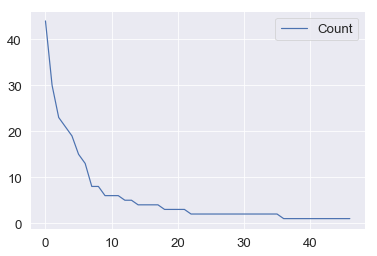

In [33]:
# See the long tail of low frequency doctrines
instance_distributions.plot()

### Unique and shared doctrines


In [34]:
def count_unique_doctrines():
    q = ("MATCH (a:Author)--(t:Text)--(:Question)--(i:Instance)--(d:Doctrine) "
         "WHERE (i)--(:DissertationPart {chapter:4}) "
         "AND NOT d.description = 'There can be a science of the soul' "
         "WITH collect(distinct a) as authors, d "
         "WHERE size(authors) = 1 "
         "UNWIND authors as author "
         "return count(distinct d) as cnt, author.name as name")
    return {d['name']: d['cnt'] for d in graph.run(q).data()}

# Example
unique = count_unique_doctrines()

In [35]:
def count_shared_doctrines(name):
    q = ("MATCH (a:Author)--(:Text)--(:Question)--(i1:Instance)--(d:Doctrine) "
         "WHERE (i1)--(:DissertationPart {chapter:4}) "
         "AND NOT d.description = 'There can be a science of the soul' "
         "MATCH (d)--(i2:Instance)--(:Question)--(:Text)--(a2:Author) "
         "WHERE (a) <> (a2) "
         "AND (i2)--(:DissertationPart {chapter:4}) "
         "return count(distinct d) as cnt, a.name as name")
    return {d['name']: d['cnt'] for d in graph.run(q).data()}

# Example
shared = count_shared_doctrines('John of Jandun')

In [36]:
def unique_to_shared_proportion(name, unique_dict, shared_dict):
    unique = unique_dict.get(name, 0)
    shared = shared_dict.get(name, 0)
    try:
        return unique / (unique + shared)
    except ZeroDivisionError:
        return 0
    
# Example
unique_to_shared_proportion('John of Jandun', unique, shared)

0.26666666666666666

Now let's get the values of these for all the commentators and put them into a matrix.

In [37]:
def unique_shared_doctrines_all(authors, unique_dict, shared_dict):
    d = {}
    for a in authors:
        unique = unique_dict.get(a, 0)
        shared = shared_dict.get(a, 0)
        prop = unique_to_shared_proportion(a, unique_dict, shared_dict)
        
        d[a] = [unique, shared, unique + shared, round(prop, 2)]
    return d

# Example
m = unique_shared_doctrines_all(author_names, unique, shared)

Put this in a DataFrame and sort according to most unique.

In [38]:
uniqueness_df_orig = pd.DataFrame(m, index=['Unique', 'Shared', 'Sum', 'Proportion'])
uniqueness_df = uniqueness_df_orig.T.sort_values(by='Proportion', ascending=False)
uniqueness_df[['Unique', 'Shared', 'Sum']] = uniqueness_df[['Unique', 'Shared', 'Sum']].astype(int)
uniqueness_df

,Unique,Shared,Sum,Proportion
Anonymus Steenberghen,2,4,6,0.33
John of Jandun,4,11,15,0.27
Anonymus Mertoniensis 275,4,12,16,0.25
Henric de la Wyle,4,13,17,0.24
Anonymus Bernardini,2,8,10,0.20
Anonymus Bazan,1,5,6,0.17
Radulphus Brito,1,9,10,0.10
Anonymus Vat. Lat. 2170 1,1,10,11,0.09
Simon of Faversham,1,10,11,0.09
Anonymus Giele,0,5,5,0.00


In [39]:
save_table(
    table=uniqueness_df.to_latex(),
    filename='../thesis/data/tables/science-unique-shared-doctrines.tex',
    label='tab:science:unique-shared-doctrines',
    caption='Unique, shared, total and proportion of unique and shared doctrines.'
)

Printed the following table to ../thesis/data/tables/science-unique-shared-doctrines.tex:
\\begin{table}
\centering
\begin{tabular}{lrrrr}
\toprule
{} &  Unique &  Shared &  Sum &  Proportion \\
\midrule
Anonymus Steenberghen     &       2 &       4 &    6 &        0.33 \\
John of Jandun            &       4 &      11 &   15 &        0.27 \\
Anonymus Mertoniensis 275 &       4 &      12 &   16 &        0.25 \\
Henric de la Wyle         &       4 &      13 &   17 &        0.24 \\
Anonymus Bernardini       &       2 &       8 &   10 &        0.20 \\
Anonymus Bazan            &       1 &       5 &    6 &        0.17 \\
Radulphus Brito           &       1 &       9 &   10 &        0.10 \\
Anonymus Vat. Lat. 2170 1 &       1 &      10 &   11 &        0.09 \\
Simon of Faversham        &       1 &      10 &   11 &        0.09 \\
Anonymus Giele            &       0 &       5 &    5 &        0.00 \\
Anonymus Oriel 33         &       0 &      13 &   13 &        0.00 \\
Anonymus Vat. Lat. 2170 2 

In [40]:
# The sums?
uniqueness_df[['Unique', 'Shared', 'Sum']].sum()

Unique     20
Shared    124
Sum       144
dtype: int64

Notice that these numbers are not identical to the sums above. A unique doctrine is a doctrine that has at least one instantiation by exactly one author (i.e. he may use it more than once), while a shared doctrine has at least one instantiation two or more authors. 

This means that the number is a combination of doctrines and instantiations, and is therefore not identical to the separate doctrine and instance sums above. Any correspondence between the two is coincidental.

In [41]:
# Statistical summary
uniqueness_df.describe()

,Unique,Shared,Sum,Proportion
count,14.000000,14.000000,14.000000,14.000000
mean,1.428571,8.857143,10.285714,0.124286
std,1.554858,3.207135,4.065399,0.117912
min,0.000000,4.000000,5.000000,0.000000
25%,0.000000,5.500000,6.250000,0.000000
50%,1.000000,9.500000,10.500000,0.095000
75%,2.000000,11.750000,12.750000,0.230000
max,4.000000,13.000000,17.000000,0.330000


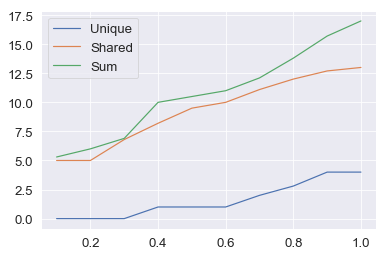

In [42]:
# Plot of the decentiles of unique, shared and sums
uniqueness_df[['Unique', 'Shared', 'Sum']].quantile(np.arange(0.1, 1.1, 0.1)).plot()

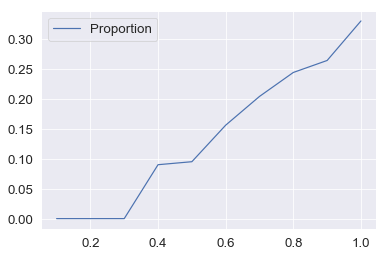

In [43]:
# Plot of the decentiles of the unique-shared proportions
uniqueness_df[['Proportion']].quantile(np.arange(0.1, 1.1, 0.1)).plot()

### Most popular determination and rationes doctrines

#### All

In [44]:
q = ("match (d:Doctrine)-[:OF]-(i:Instance)--(:Question)--(:Text)--(a:Author)"
     "WHERE (i)--(:DissertationPart {chapter:4}) "
     "return distinct d.description as conclusions, d.label as label, collect(distinct a.name) as names, count(distinct i) as uses "
     "order by uses desc")
graph.run(q).to_table()

conclusions,label,names,uses
Primary and secondary intelligibility,['P1'],"['Anonymus Vennebusch', 'Anonymus Bazan', 'Anonymus Bernardini', 'Anonymus Mertoniensis 275', 'Anonymus Vat. Lat. 2170 1', 'Anonymus Vat. Lat. 2170 2', 'Anonymus Giele', 'Anonymus Oriel 33', 'Henric de la Wyle', 'John of Jandun', 'John Dinsdale', 'Radulphus Brito', 'Simon of Faversham']",30
Substantial knowledge from accidents,['P3'],"['Anonymus Vennebusch', 'Anonymus Bernardini', 'Anonymus Mertoniensis 275', 'Anonymus Vat. Lat. 2170 1', 'Anonymus Giele', 'Anonymus Oriel 33', 'John of Jandun', 'John Dinsdale', 'Radulphus Brito', 'Simon of Faversham']",23
Soul not available to sense perception,"['P72', 'N2']","['Anonymus Vennebusch', 'Anonymus Bazan', 'Anonymus Bernardini', 'Anonymus Mertoniensis 275', 'Anonymus Vat. Lat. 2170 1', 'Anonymus Vat. Lat. 2170 2', 'Anonymus Giele', 'Anonymus Oriel 33', 'Henric de la Wyle', 'John of Jandun', 'John Dinsdale', 'Radulphus Brito', 'Simon of Faversham']",19
"Science about subject, parts or properties, principles","['P6', 'N8']","['Anonymus Bazan', 'Anonymus Mertoniensis 275', 'Anonymus Steenberghen', 'Anonymus Vat. Lat. 2170 1', 'Anonymus Vat. Lat. 2170 2', 'Anonymus Oriel 33', 'Henric de la Wyle', 'John of Jandun', 'John Dinsdale', 'Radulphus Brito', 'Simon of Faversham']",14
There can be a science of the soul,[],"['Anonymus Vennebusch', 'Anonymus Bazan', 'Anonymus Bernardini', 'Anonymus Mertoniensis 275', 'Anonymus Steenberghen', 'Anonymus Vat. Lat. 2170 1', 'Anonymus Vat. Lat. 2170 2', 'Anonymus Giele', 'Anonymus Oriel 33', 'Henric de la Wyle', 'John of Jandun', 'John Dinsdale', 'Radulphus Brito', 'Simon of Faversham']",14
"Knowledge is continuous and temporal, but soul is simple",['N6'],"['Anonymus Bernardini', 'Anonymus Mertoniensis 275', 'Anonymus Oriel 33', 'Henric de la Wyle', 'John Dinsdale']",8
Identity of mover and moved impossible,['N3'],"['Anonymus Oriel 33', 'Henric de la Wyle', 'John of Jandun', 'John Dinsdale']",8
Soul not intelligible to us,"['P55', 'N1']","['Anonymus Bazan', 'Anonymus Oriel 33', 'Henric de la Wyle', 'John of Jandun', 'John Dinsdale', 'Radulphus Brito']",6
Science through self-reflection,['P9'],"['Anonymus Bazan', 'Anonymus Bernardini', 'Anonymus Mertoniensis 275', 'Anonymus Vat. Lat. 2170 1', 'Radulphus Brito', 'Simon of Faversham']",6
Form of particular can be studied as a universal,['P15'],"['Anonymus Vat. Lat. 2170 1', 'Anonymus Giele', 'John of Jandun', 'Simon of Faversham']",5


#### Attacking doctrines

In [45]:
q = ("match (d:Doctrine)<-[:OF]-(i:Instance {type:'Negative ratio'})<-[:HAS]-(q:Question)--(:Text)--(a:Author) "
     "WHERE (i)--(:DissertationPart {chapter:4}) "
     "return distinct d.description as Description, d.label as Labels, count(distinct i) as Uses, count(distinct a) as User_count, collect(distinct a.name) as Users "
     "order by length(Users) desc")
popular_attacking = graph.run(q).to_data_frame()
popular_attacking


,Description,Labels,User_count,Users,Uses
0,Soul not available to sense perception,"[P72, N2]",13,"[Anonymus Vat. Lat. 2170 2, Anonymus Bazan, Jo...",18
1,Soul not intelligible to us,"[P55, N1]",6,"[Anonymus Bazan, John Dinsdale, Henric de la W...",6
2,"Knowledge is continuous and temporal, but soul...",[N6],5,"[John Dinsdale, Henric de la Wyle, Anonymus Be...",8
3,"Science about subject, parts or properties, pr...","[P6, N8]",5,"[Anonymus Vat. Lat. 2170 2, Anonymus Bazan, Ra...",5
4,"Things most manifest in nature are opaque, so ...",[N10],4,"[John Dinsdale, Anonymus Bernardini, Anonymus ...",4
5,Identity of mover and moved impossible,[N3],4,"[John Dinsdale, Henric de la Wyle, John of Jan...",8
6,"Soul is a particular, so there can be no scien...",[N9],4,"[Henric de la Wyle, John of Jandun, Simon of F...",4
7,Identity of knower and known impossible,[N5],4,"[Henric de la Wyle, John of Jandun, Anonymus V...",4
8,No science about corruptible things,[N13],3,"[John of Jandun, Anonymus Steenberghen, Anonym...",3
9,"No universal about the soul, as it requires se...",[N15],2,"[Henric de la Wyle, Anonymus Vennebusch]",2


## High level clusters: Proportional distribution matrices

### Determinations

In [46]:
def proportion_shared_determination_doctrines(name):
    shared = graph.run(
        """
        MATCH (a1:Author {name:'%s'})-[:WROTE]->(:Text)-[:CONTAINS]->(:Question)-[:HAS]->(ia:Instance)--(d:Doctrine) 
        WHERE (ia)--(:DissertationPart {chapter:4}) 
        AND NOT EXISTS(ia.type) AND NOT d.description = 'There can be a science of the soul'
        MATCH (a2:Author)-[:WROTE]->(:Text)-[:CONTAINS]->(:Question)-[:HAS]->(ib:Instance)--(d) 
        WHERE (ib)--(:DissertationPart {chapter:4}) 
        AND NOT EXISTS(ib.type) AND NOT d.description = 'There can be a science of the soul'
        RETURN a2.name as name, count(distinct d) as shared
        """ % name
    ).data()
    shared = {d['name']: d['shared'] for d in shared}
    main = graph.run(
        "MATCH (a1:Author {name:'%s'})-[:WROTE]->(:Text)-[:CONTAINS]->(:Question)-[:HAS]->(i1:Instance)--(d1:Doctrine) "
        "WHERE (i1)--(:DissertationPart {chapter:4}) "         
        "AND NOT EXISTS(i1.type) AND NOT d1.description = 'There can be a science of the soul' "
        "RETURN count(distinct d1)" % name
    ).evaluate()
    others = {}
    for d in shared:
        other = graph.run(
            "MATCH (a2:Author {name:'%s'})-[:WROTE]->(:Text)-[:CONTAINS]->(:Question)-[:HAS]->(i2:Instance)--(d2:Doctrine) "
            "WHERE (i2)--(:DissertationPart {chapter:4}) "         
            "AND NOT EXISTS(i2.type) AND NOT d2.description = 'There can be a science of the soul' "
            "RETURN count(distinct d2)" % d
        ).evaluate()
        others[d] = shared[d] / (main + other - shared[d])
    return others
    
    # return {d['name']: d['proportion'] for d in graph.run(q).data()}

proportion_shared_determination_doctrines('John Dinsdale')

{'Anonymus Vennebusch': 0.3333333333333333,
 'Anonymus Vat. Lat. 2170 1': 0.25,
 'Radulphus Brito': 0.25,
 'Anonymus Bernardini': 0.2857142857142857,
 'Henric de la Wyle': 0.5,
 'Anonymus Giele': 0.25,
 'Anonymus Mertoniensis 275': 0.4444444444444444,
 'John Dinsdale': 1.0,
 'John of Jandun': 0.3333333333333333,
 'Anonymus Vat. Lat. 2170 2': 0.2,
 'Anonymus Oriel 33': 1.0,
 'Simon of Faversham': 0.5}

In [47]:
d = build_matrix(author_names, docfunc=proportion_shared_determination_doctrines)        

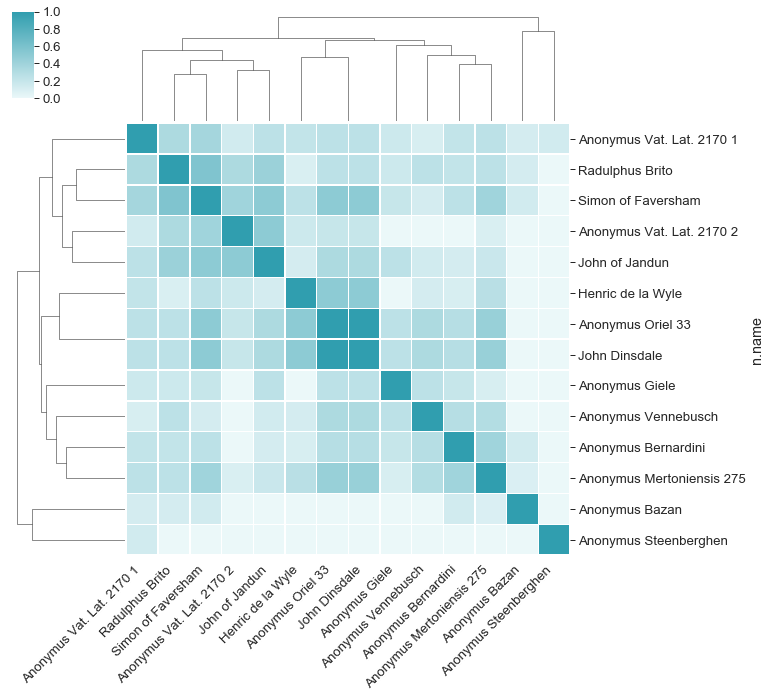

In [48]:
doctrine_frame = pd.DataFrame(d, index=author_names)

# Generate a custom diverging colormap
cmap = sns.light_palette((210, 90, 60), as_cmap=True, input="husl")

# Draw the heatmap with the mask and correct aspect ratio
plot = sns.clustermap(doctrine_frame, cmap=cmap, linewidths=.5, row_cluster=True)
for _, ax in enumerate(plot.fig.axes):
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


In [49]:
plot.savefig('../thesis/data/figures/science-determ-proportional-clustermap.pdf')
print_figure_inclusion(
    '../figures/science-determ-proportional-clustermap',
    caption='Proportional clustermap of determination doctrines.',
    label='fig:science:determ:prop-clustermap')

\begin{figure}
\centering
\includegraphics[width=\linewidth]{data/figures/science-determ-proportional-clustermap.pdf}
\caption{Proportional clustermap of determination doctrines.}
\label{fig:science:determ:prop-clustermap}
\end{figure}


### Rationes

In [1]:
def proportion_shared_rationes_doctrines(name):
    shared = graph.run(
        """
        MATCH (a1:Author {name:'%s'})-[:WROTE]->(:Text)-[:CONTAINS]->(:Question)-[:HAS]->(ia:Instance)--(d:Doctrine) 
        WHERE (ia)--(:DissertationPart) 
        AND (ia.type = 'Negative ratio' or ia.type = 'Refutation') 
        AND NOT d.description = 'There can be a science of the soul' 
        MATCH (a2:Author)-[:WROTE]->(:Text)-[:CONTAINS]->(:Question)-[:HAS]->(ib:Instance)--(d) 
        WHERE (ib)--(:DissertationPart) 
        AND (ib.type = 'Negative ratio' or ib.type = 'Refutation')
        AND NOT d.description = 'There can be a science of the soul' 
        RETURN a2.name as name, count(distinct d) as shared
        """ % name
    ).data()
    shared = {d['name']: d['shared'] for d in shared}
    main = graph.run(
        "MATCH (a1:Author {name:'%s'})-[:WROTE]->(:Text)-[:CONTAINS]->(:Question)-[:HAS]->(i1:Instance)--(d1:Doctrine) "
        "WHERE (i1)--(:DissertationPart) "         
        "AND (i1.type = 'Negative ratio' or i1.type = 'Refutation') "
        "AND NOT d1.description = 'There can be a science of the soul' "
        "RETURN count(distinct d1)" % name
    ).evaluate()
    others = {}
    for d in shared:
        other = graph.run(
            "MATCH (a2:Author {name:'%s'})-[:WROTE]->(:Text)-[:CONTAINS]->(:Question)-[:HAS]->(i2:Instance)--(d2:Doctrine) "
            "WHERE (i2)--(:DissertationPart) "         
            "AND (i2.type = 'Negative ratio' or i2.type = 'Refutation') "
            "AND NOT d2.description = 'There can be a science of the soul' "
            "RETURN count(distinct d2)" % d
        ).evaluate()
        others[d] = shared[d] / (main + other - shared[d])
    return others

proportion_shared_rationes_doctrines('Anonymus Vat. Lat 2170 1')

NameError: name 'graph' is not defined

In [51]:
rationes_matrix = build_matrix(author_names, docfunc=proportion_shared_rationes_doctrines)

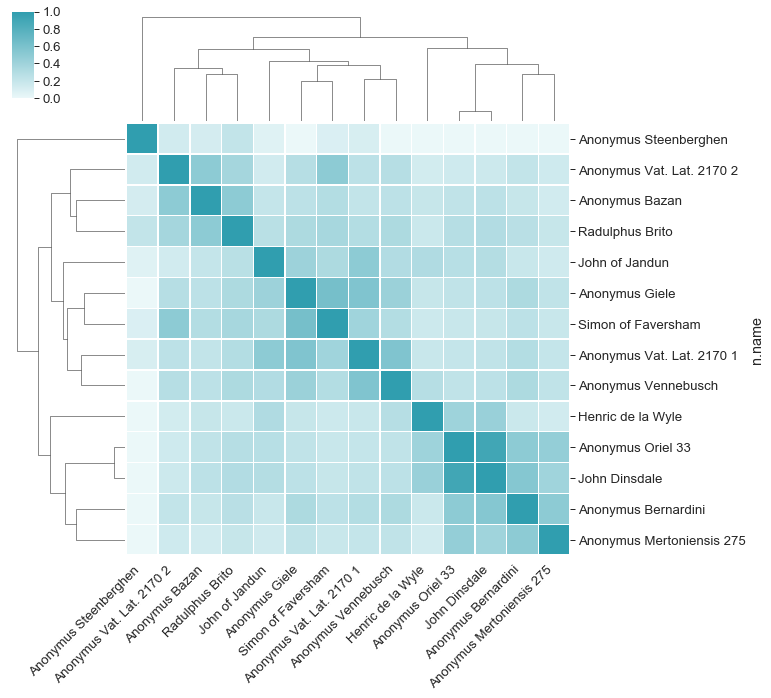

In [52]:
rationes_frame = pd.DataFrame(rationes_matrix, index=author_names)

# Generate a custom diverging colormap
cmap = sns.light_palette((210, 90, 60), as_cmap=True, input="husl")

# Draw the heatmap with the mask and correct aspect ratio
plot = sns.clustermap(rationes_frame, cmap=cmap, linewidths=.5, row_cluster=True)
for _, ax in enumerate(plot.fig.axes):
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

In [53]:
plot.savefig('../thesis/data/figures/science-rationes-proportional-clustermap.pdf')
print_figure_inclusion(
    '../figures/science-rationes-proportional-clustermap',
    caption='Proportional clustermap of \emph{rationes} doctrines.',
    label='fig:science:rationes:prop-clustermap')

\begin{figure}
\centering
\includegraphics[width=\linewidth]{data/figures/science-rationes-proportional-clustermap.pdf}
\caption{Proportional clustermap of \emph{rationes} doctrines.}
\label{fig:science:rationes:prop-clustermap}
\end{figure}


### All doctrines

In [54]:
def proportion_shared_doctrines(name):
    shared_data = graph.run(
        "MATCH (a1:Author {name:'%s'})-[:WROTE]->(:Text)-[:CONTAINS]->(:Question)-[:HAS]->(ia:Instance)--(d:Doctrine) "
        "WHERE (ia)--(:DissertationPart {chapter:4}) "
        "AND NOT d.description = 'There can be a science of the soul' "
        "MATCH (a2:Author)-[:WROTE]->(:Text)-[:CONTAINS]->(:Question)-[:HAS]->(ib:Instance)--(d) "
        "WHERE (ib)--(:DissertationPart {chapter:4}) "
        "AND NOT d.description = 'There can be a science of the soul' "
        "RETURN a2.name as name, count(distinct d) as shared" % name
    ).data()
    shared_dict = {d['name']: d['shared'] for d in shared_data}
    sum_start = graph.run(
        "MATCH (:Author {name:'%s'})-[:WROTE]->(:Text)-[:CONTAINS]->(:Question)-[:HAS]->(i1:Instance)--(d1:Doctrine) "
        "WHERE (i1)--(:DissertationPart {chapter:4}) "
        "AND NOT d1.description = 'There can be a science of the soul' "
        "RETURN count(distinct d1) " % name
    ).evaluate()
    proportional_dict = {}
    for other, shared in shared_dict.items():   
        sum_other = graph.run(
            "MATCH (:Author {name:'%s'})-[:WROTE]->(:Text)-[:CONTAINS]->(:Question)-[:HAS]->(i2:Instance)--(d2:Doctrine) "
            "WHERE (i2)--(:DissertationPart {chapter:4}) "
            "AND NOT d2.description = 'There can be a science of the soul' "
            "RETURN count(distinct d2) " % other
        ).evaluate()
        shared_dict[other] = shared / (sum_start + sum_other - shared)
    return shared_dict

dinsdale = proportion_shared_doctrines('John Dinsdale')
dinsdale

{'Anonymus Vennebusch': 0.1875,
 'Anonymus Bazan': 0.2857142857142857,
 'Anonymus Vat. Lat. 2170 1': 0.21052631578947367,
 'Radulphus Brito': 0.29411764705882354,
 'Anonymus Bernardini': 0.375,
 'Henric de la Wyle': 0.45,
 'Anonymus Giele': 0.21428571428571427,
 'Anonymus Mertoniensis 275': 0.4,
 'Anonymus Steenberghen': 0.058823529411764705,
 'John of Jandun': 0.2857142857142857,
 'John Dinsdale': 1.0,
 'Anonymus Vat. Lat. 2170 2': 0.21428571428571427,
 'Simon of Faversham': 0.2777777777777778,
 'Anonymus Oriel 33': 0.9230769230769231}

In [55]:
#Example table of dinsdale
dinsdale_df = pd.DataFrame(dinsdale, index=['Proportion']).round(2)
dinsdale_df.index.name = 'Name'
dinsdale_df = dinsdale_df.T.sort_values(ascending=False, by='Proportion')
dinsdale_df

Name,Proportion
John Dinsdale,1.00
Anonymus Oriel 33,0.92
Henric de la Wyle,0.45
Anonymus Mertoniensis 275,0.40
Anonymus Bernardini,0.38
Anonymus Bazan,0.29
Radulphus Brito,0.29
John of Jandun,0.29
Simon of Faversham,0.28
Anonymus Vat. Lat. 2170 1,0.21


In [56]:
all_matrix = build_matrix(author_names, docfunc=proportion_shared_doctrines)

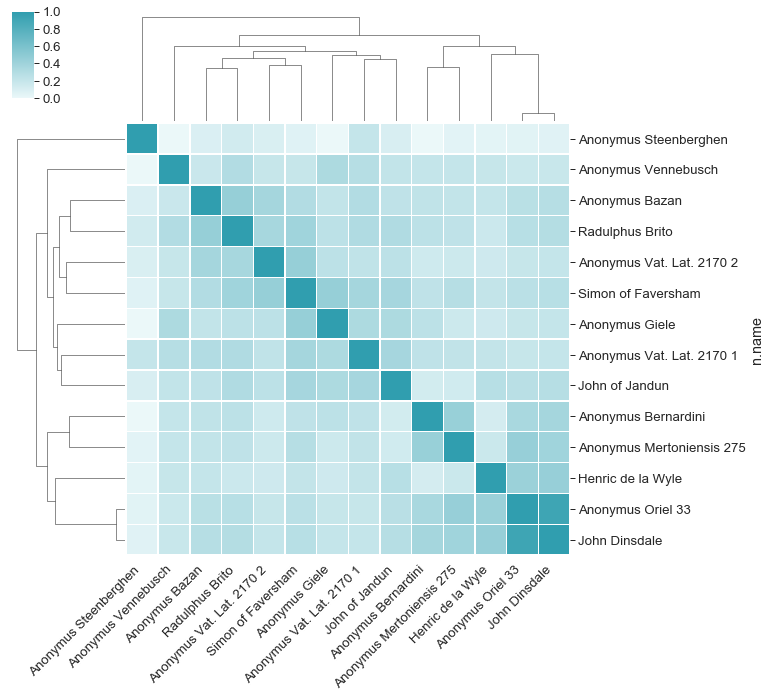

In [57]:
all_frame = pd.DataFrame(all_matrix, index=author_names)

# Generate a custom diverging colormap
cmap = sns.light_palette((210, 90, 60), as_cmap=True, input="husl")

# Draw the heatmap with the mask and correct aspect ratio
plot = sns.clustermap(all_frame, cmap=cmap, linewidths=.5, row_cluster=True)
for _, ax in enumerate(plot.fig.axes):
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

In [39]:
plot.savefig('../thesis/data/figures/science-all-proportional-clustermap.pdf')
print_figure_inclusion(
    '../figures/science-all-proportional-clustermap',
    caption='Proportional clustermap of all doctrines.',
    label='fig:science:all:prop-clustermap')

\begin{figure}
\centering
\includegraphics[width=\linewidth]{data/figures/science-all-proportional-clustermap.pdf}
\caption{Proportional clustermap of all doctrines.}
\label{fig:science:all:prop-clustermap}
\end{figure}


Get a path of specific combinations
This matches supporting to a level of 8 nodes.
```
match (:Conclusion)-[:OF]->(dc:Doctrine)
call apoc.path.expand(dc, "<SUPPORTS,<SUPPORTS|<IMPLIES|OF>", "Instance|Doctrine", 1, 8) yield path as pp
return pp
```

# Create doctrinal matrix
Here we want to create a matrix table where it can be seen in more detail which doctrines each commentator uses. It is probably a good idea to distinguish between determination doctrines and rationes doctrines.

First we pull out a list of the names of the doctrines in determinations of each commentator.

## Determination doctrines

In [58]:
def determination_doctrines_of(name):
    q = ("MATCH (a:Author {name:'%s'})--(t:Text)--(q:Question)--(i:Instance)--(d:Doctrine) "
         "WHERE not exists(i.type) "
         "AND NOT d.description = 'There can be a science of the soul' "
         "AND (i)--(:DissertationPart {chapter:4}) "
         "RETURN distinct d.label as Label, d.description as Doctrine " % name )
    docs = []
    for d in graph.run(q).data():
        if d['Label']:
            docs.append(', '.join(d['Label']) + ': ' + d['Doctrine'])
        else:
            docs.append(d['Doctrine'])
    return docs

# Example test
determination_doctrines_of("John of Jandun")

['P6, N8: Science about subject, parts or properties, principles',
 'P3: Substantial knowledge from accidents',
 'P58: Science by answering (four) scientific questions',
 'P17: Intellect especially difficult to know']

Then we create a full list of all the doctrines in determinations.

In [59]:
def all_determination_doctrines():
    q = ("MATCH (i:Instance)--(d:Doctrine) "
         "WHERE not exists(i.type) "
         "AND NOT d.description = 'There can be a science of the soul' "
         "AND (i)--(:DissertationPart {chapter:4}) "
         "RETURN distinct d.description as Doctrine, d.label as Label")
    docs = []
    for d in graph.run(q).data():
        if d['Label']:
            docs.append(', '.join(d['Label']) + ': ' + d['Doctrine'])
        else:
            docs.append(d['Doctrine'])
    return docs

all_determination_docs = all_determination_doctrines()

# Test output
all_determination_docs

['P3: Substantial knowledge from accidents',
 'P5: An immaterial substance is self-reflexive',
 'P1: Primary and secondary intelligibility',
 'P22: Identity of knower and known in immaterial substances',
 'P16: Proper and improper science',
 'P58: Science by answering (four) scientific questions',
 'P9: Science through self-reflection',
 'P55, N1: Soul not intelligible to us',
 'P45: The stronger principle of attribution',
 'P35: No science of the separate soul',
 'P51: Certain science about simple subject',
 'P60: Four requirements of a science',
 'P17: Intellect especially difficult to know',
 'P49: Science from observations of accidents is also science',
 'P6, N8: Science about subject, parts or properties, principles',
 'P40: Science about a substance which contains parts and properties',
 'P73: Science of form and perfection',
 'P54: Science requires intelligible essence or definition',
 'P21: Three meanings of science',
 'P72, N2: Soul not available to sense perception',
 'P32: S

Now for each author we register how many of the doctrines he ticks off and reads that into a matrix.

In [60]:
matrix = {}
for author in author_names:
    matrix[author] = []
    adocs = determination_doctrines_of(author)
    for doc in all_determination_docs:
        if doc in adocs:
            matrix[author].append(1)
        else:
            matrix[author].append(0)


determination_df = pd.DataFrame(matrix, index=all_determination_docs)
determination_df

,Anonymus Bazan,Anonymus Bernardini,Anonymus Giele,Anonymus Mertoniensis 275,Anonymus Oriel 33,Anonymus Steenberghen,Anonymus Vat. Lat. 2170 1,Anonymus Vat. Lat. 2170 2,Anonymus Vennebusch,Henric de la Wyle,John Dinsdale,John of Jandun,Radulphus Brito,Simon of Faversham
P3: Substantial knowledge from accidents,0,1,1,1,1,0,1,0,1,0,1,1,1,1
P5: An immaterial substance is self-reflexive,0,0,0,1,0,0,0,0,0,0,0,0,0,0
P1: Primary and secondary intelligibility,0,1,0,1,1,0,0,0,1,1,1,0,0,0
P22: Identity of knower and known in immaterial substances,0,1,0,1,0,0,0,0,0,0,0,0,0,0
P16: Proper and improper science,0,0,0,1,1,0,0,0,0,1,1,0,0,1
P58: Science by answering (four) scientific questions,0,0,0,0,0,0,0,0,0,0,0,1,0,0
P9: Science through self-reflection,1,1,0,1,0,0,1,0,0,0,0,0,1,1
"P55, N1: Soul not intelligible to us",1,0,0,0,0,0,0,0,0,0,0,0,0,0
P45: The stronger principle of attribution,0,0,0,1,0,0,0,0,1,0,0,0,0,0
P35: No science of the separate soul,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [61]:
sums = determination_df.sum().sort_values(ascending=False)
sums

Anonymus Mertoniensis 275    9
Radulphus Brito              6
Anonymus Vat. Lat. 2170 1    6
Simon of Faversham           5
Henric de la Wyle            5
Anonymus Bernardini          5
John of Jandun               4
John Dinsdale                4
Anonymus Vennebusch          4
Anonymus Oriel 33            4
Anonymus Bazan               3
Anonymus Vat. Lat. 2170 2    2
Anonymus Steenberghen        2
Anonymus Giele               1
dtype: int64

What is the mean amount of doctrines?

In [62]:
determination_df.sum().mean()

4.285714285714286

### Popularity of arguments

In [63]:
determination_df.sum(axis=1).sort_values(ascending=False)

P3: Substantial knowledge from accidents                                   10
P6, N8: Science about subject, parts or properties, principles              9
P9: Science through self-reflection                                         6
P1: Primary and secondary intelligibility                                   6
P16: Proper and improper science                                            5
P17: Intellect especially difficult to know                                 4
P21: Three meanings of science                                              2
P40: Science about a substance which contains parts and properties          2
P22: Identity of knower and known in immaterial substances                  2
P35: No science of the separate soul                                        2
P45: The stronger principle of attribution                                  2
P5: An immaterial substance is self-reflexive                               1
P58: Science by answering (four) scientific questions           

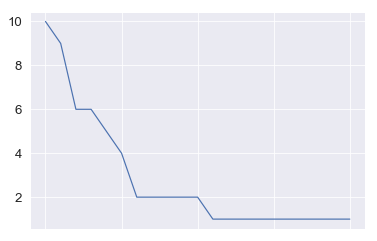

In [64]:
determination_df.sum(axis=1).sort_values(ascending=False).plot()

### Binary matrix cluster analysis
So what if we take the binary matrix representing the presence or absence of a doctrine and use that for clustering?
I have used this as an inspiration: https://stats.stackexchange.com/questions/222492/any-distance-measures-that-are-more-useful-for-binary-data-clustering.
As suggested in the post we use the Hamming metric for distance measuring, as that just counts the number of coordinates that differ. AS it is also mentioned in the scipy documentation it can therefore be used for boolean matrices (https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html).

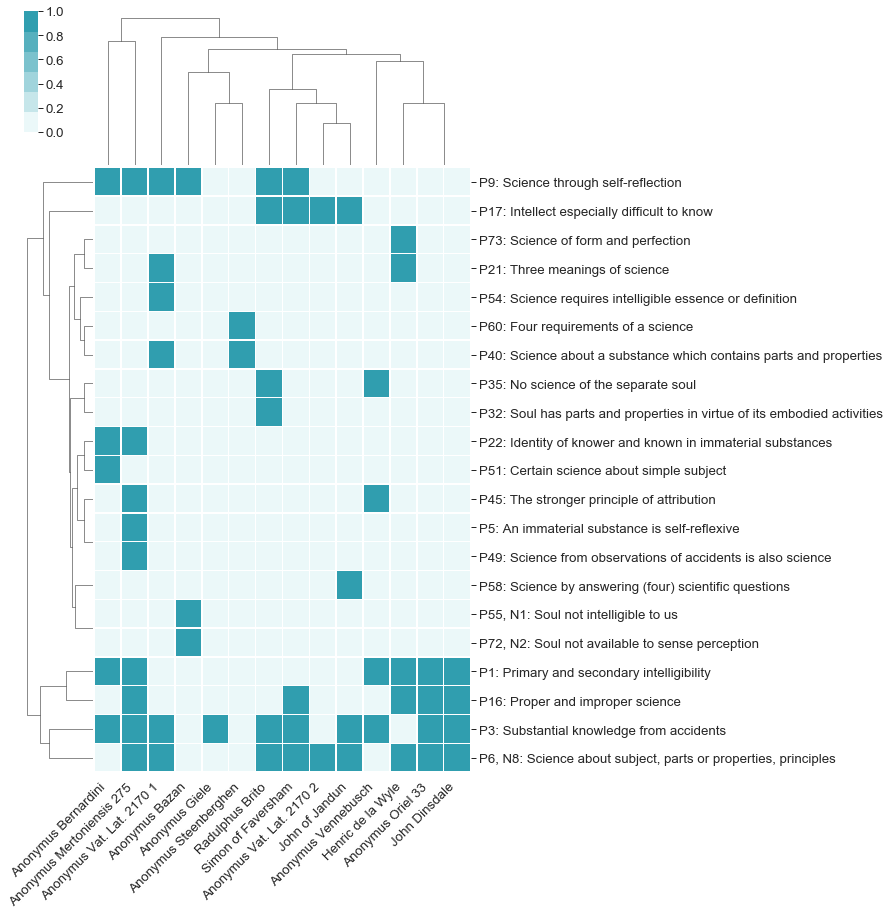

In [65]:
# Generate a custom diverging colormap
cmap = sns.light_palette((210, 90, 60), input="husl")

# Draw the heatmap with the mask and correct aspect ratio
plot = sns.clustermap(determination_df, cmap=cmap, linewidths=.5, figsize=(8, 14), row_cluster=True, metric='hamming')

for _, ax in enumerate(plot.fig.axes):
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

In [66]:
plot.savefig('../thesis/data/figures/science-determination-binary-clustermap.pdf')
print_figure_inclusion(
    'science-determinations-binary-clustermap.pdf',
    caption='Binary doctrinal matrix of determination doctrines.',
    label='fig:science:determination:binary-clustermap')

\begin{figure}
\centering
\includegraphics[width=\linewidth]{data/figures/science-determinations-binary-clustermap.pdf}
\caption{Binary doctrinal matrix of determination doctrines.}
\label{fig:science:determination:binary-clustermap}
\end{figure}


## Rationes doctrines

In [67]:
def rationes_doctrines_of(name):
    q = ("MATCH (a:Author {name:'%s'})--(t:Text)--(q:Question)--(i:Instance)-[:OF]->(d:Doctrine) "
         "WHERE (i.type = 'Negative ratio' OR i.type = 'Refutation') "
         "AND (i)--(:DissertationPart {chapter:4}) "
         "RETURN distinct d.label as Label, d.description as Doctrine " % name )
    docs = []
    for d in graph.run(q).data():
        if d['Label']:
            docs.append(', '.join(d['Label']) + ': ' + d['Doctrine'])
        else:
            docs.append(d['Doctrine'])
    return docs

# Example test
rationes_doctrines_of("John of Jandun")

['P3: Substantial knowledge from accidents',
 'P55, N1: Soul not intelligible to us',
 'N9: Soul is a particular, so there can be no science about it',
 'P15: Form of particular can be studied as a universal',
 'P72, N2: Soul not available to sense perception',
 'N3: Identity of mover and moved impossible',
 'N13: No science about corruptible things',
 'N17: Nothing can be stripped of itself',
 'P1: Primary and secondary intelligibility',
 'N36: No science about the non-existent',
 'P78: Soul does exists as something outside itself (in certain sense)',
 'N5: Identity of knower and known impossible']

Then we create a full list of all the doctrines in rationes.

In [68]:
def all_rationes_doctrines():
    q = ("MATCH (i:Instance)-[:OF]->(d:Doctrine) "
         "WHERE (i.type = 'Negative ratio' OR i.type = 'Refutation') "
         "AND (i)--(:DissertationPart {chapter:4}) "
         "RETURN distinct d.label as Label, d.description as Doctrine " )
    docs = []
    for d in graph.run(q).data():
        if d['Label']:
            docs.append(', '.join(d['Label']) + ': ' + d['Doctrine'])
        else:
            docs.append(d['Doctrine'])
    return docs

all_rationes_docs = all_rationes_doctrines()

# Test output
all_rationes_docs

['P6, N8: Science about subject, parts or properties, principles',
 'N5: Identity of knower and known impossible',
 'N6: Knowledge is continuous and temporal, but soul is simple',
 'N10: Things most manifest in nature are opaque, so no science of the soul',
 'P1: Primary and secondary intelligibility',
 'P33: Perfect mover can move itself',
 'P76: Soul is simple in essence but has different powers (partes potentiales)',
 'P55, N1: Soul not intelligible to us',
 'P72, N2: Soul not available to sense perception',
 'P15: Form of particular can be studied as a universal',
 'N9: Soul is a particular, so there can be no science about it',
 'P3: Substantial knowledge from accidents',
 'P24: The soul is difficult but not impossible to know',
 'P5: An immaterial substance is self-reflexive',
 'N3: Identity of mover and moved impossible',
 'P32: Soul has parts and properties in virtue of its embodied activities',
 'P47: The soul is not known through phantasms',
 'N32: Science proceeds from cause

Now for each author we register how many of the doctrines he ticks off and reads that into a matrix.

In [69]:
matrix = {}
for author in author_names:
    matrix[author] = []
    adocs = rationes_doctrines_of(author)
    for doc in all_rationes_docs:
        if doc in adocs:
            matrix[author].append(1)
        else:
            matrix[author].append(0)


rationes_df = pd.DataFrame(matrix, index=all_rationes_docs)
rationes_df

,Anonymus Bazan,Anonymus Bernardini,Anonymus Giele,Anonymus Mertoniensis 275,Anonymus Oriel 33,Anonymus Steenberghen,Anonymus Vat. Lat. 2170 1,Anonymus Vat. Lat. 2170 2,Anonymus Vennebusch,Henric de la Wyle,John Dinsdale,John of Jandun,Radulphus Brito,Simon of Faversham
"P6, N8: Science about subject, parts or properties, principles",1,0,0,0,0,1,0,1,0,0,0,0,1,1
N5: Identity of knower and known impossible,0,0,0,0,0,0,1,0,1,1,0,1,0,0
"N6: Knowledge is continuous and temporal, but soul is simple",0,1,0,1,1,0,0,0,0,1,1,0,0,0
"N10: Things most manifest in nature are opaque, so no science of the soul",0,1,0,1,1,0,0,0,0,0,1,0,0,0
P1: Primary and secondary intelligibility,1,1,1,1,1,0,1,1,1,1,1,1,1,1
P33: Perfect mover can move itself,0,0,0,0,1,0,0,0,0,1,1,0,0,0
P76: Soul is simple in essence but has different powers (partes potentiales),1,0,0,0,0,0,0,0,0,0,0,0,0,0
"P55, N1: Soul not intelligible to us",1,0,0,0,1,0,0,0,0,1,1,1,1,0
"P72, N2: Soul not available to sense perception",1,1,1,1,1,0,1,1,1,1,1,1,1,1
P15: Form of particular can be studied as a universal,0,0,1,0,0,0,1,0,0,0,0,1,0,1


In [70]:
sums = rationes_df.sum().sort_values(ascending=False)
sums

Henric de la Wyle            13
John of Jandun               12
Anonymus Oriel 33            11
Anonymus Mertoniensis 275    11
John Dinsdale                10
Simon of Faversham            8
Radulphus Brito               7
Anonymus Bernardini           7
Anonymus Vat. Lat. 2170 1     6
Anonymus Vennebusch           5
Anonymus Giele                5
Anonymus Bazan                5
Anonymus Vat. Lat. 2170 2     4
Anonymus Steenberghen         4
dtype: int64

What is the mean amount of doctrines?

In [71]:
rationes_df.sum().mean()

7.714285714285714

### Popularity of arguments

In [72]:
rationes_df.sum(axis=1).sort_values(ascending=False)

P1: Primary and secondary intelligibility                                           13
P72, N2: Soul not available to sense perception                                     13
P3: Substantial knowledge from accidents                                            10
P55, N1: Soul not intelligible to us                                                 6
P6, N8: Science about subject, parts or properties, principles                       5
N6: Knowledge is continuous and temporal, but soul is simple                         5
N9: Soul is a particular, so there can be no science about it                        4
P15: Form of particular can be studied as a universal                                4
P24: The soul is difficult but not impossible to know                                4
N3: Identity of mover and moved impossible                                           4
N10: Things most manifest in nature are opaque, so no science of the soul            4
N5: Identity of knower and known impossible

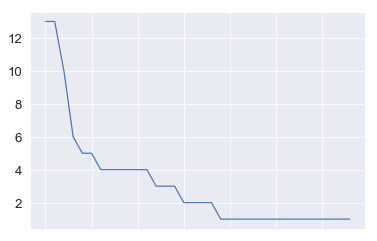

In [73]:
rationes_df.sum(axis=1).sort_values(ascending=False).plot()

### Binary matrix cluster analysis


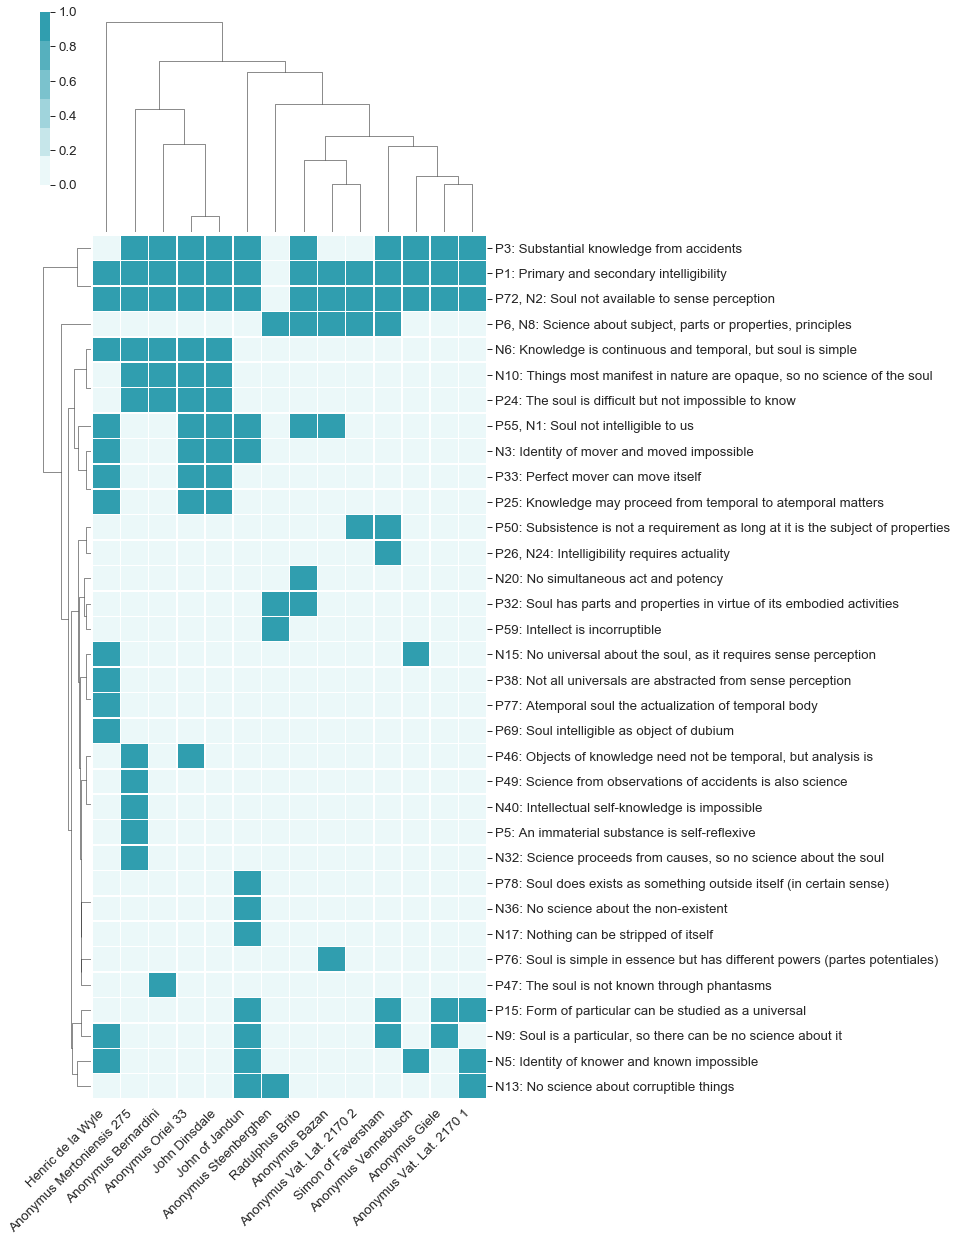

In [74]:
# Generate a custom diverging colormap
cmap = sns.light_palette((210, 90, 60), input="husl")

# Draw the heatmap with the mask and correct aspect ratio
plot = sns.clustermap(rationes_df, cmap=cmap, linewidths=.5, figsize=(8, 20), row_cluster=True, metric='hamming')

for _, ax in enumerate(plot.fig.axes):
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

In [75]:
plot.savefig('../thesis/data/figures/science-rationes-binary-clustermap.pdf')
print_figure_inclusion(
    'science-rationes-binary-clustermap.pdf',
    caption='Binary doctrinal matrix of rationes doctrines.',
    label='fig:science:rationes:binary-clustermap')

\begin{figure}
\centering
\includegraphics[width=\linewidth]{data/figures/science-rationes-binary-clustermap.pdf}
\caption{Binary doctrinal matrix of rationes doctrines.}
\label{fig:science:rationes:binary-clustermap}
\end{figure}


# Quantifying centrality

Can we see whether there are some commentators who take up a central position in terms of how big a proportion of doctrines they contain?

Can we also sort them by how by a proportion of the most common doctrines they contain? Will there be any difference between such two measures?

In [76]:
q = ('MATCH (n:Author)--(:Text)--(:Question)--(:Instance)--(:DissertationPart {chapter:4})'
     'RETURN distinct n.name as Name, id(n) as ID ORDER BY n.name asc')
df = graph.run(q).to_data_frame()
author_names = df['Name']
df

,ID,Name
0,2,Anonymus Bazan
1,697,Anonymus Bernardini
2,759,Anonymus Giele
3,723,Anonymus Mertoniensis 275
4,852,Anonymus Oriel 33
5,741,Anonymus Steenberghen
6,744,Anonymus Vat. Lat. 2170 1
7,1,Anonymus Vat. Lat. 2170 2
8,649,Anonymus Vennebusch
9,6,Henric de la Wyle


## Most common doctrines and who has most of them

Who has the highest proportion of the most common doctrines?

First we find the most popular doctrines. Let's take the upper quartile.

In [77]:
# Doctrine count instance distributions
q = ("MATCH (:DissertationPart {chapter:4})--(i:Instance)-[:OF|:IMPLIES]->(d:Doctrine) "
     "WHERE NOT d.description = 'There can be a science of the soul' "
     "RETURN count(distinct i) as Count, d.description as Description, d.label as Label "
     "ORDER BY Count DESC")

instance_distributions = graph.run(q).to_data_frame()
labels = []
for i in instance_distributions['Label']:
    if i:
        labels.append(', '.join(i))
    else:
        labels.append('')
instance_distributions['Label'] = labels

In [78]:
popular_df = instance_distributions[instance_distributions['Count'] >= int(instance_distributions.quantile(0.67))]
save_table(
    filename='../thesis/data/tables/process-popular-doctrines.tex', 
    table=popular_df.to_latex(index=False),
    caption='Top one third of determination doctrines according to popularity.',
    label='tab:process:most-popular-doctrines')

Printed the following table to ../thesis/data/tables/process-popular-doctrines.tex:
\\begin{table}
\centering
\begin{tabular}{rll}
\toprule
 Count &                                        Description &    Label \\
\midrule
    44 &             Soul not available to sense perception &  P72, N2 \\
    33 &              Primary and secondary intelligibility &       P1 \\
    25 &               Substantial knowledge from accidents &       P3 \\
    21 &                        Soul not intelligible to us &  P55, N1 \\
    21 &  Science about subject, parts or properties, pr... &   P6, N8 \\
    15 &  Knowledge is continuous and temporal, but soul... &       N6 \\
    13 &             Identity of mover and moved impossible &       N3 \\
     8 &  Things most manifest in nature are opaque, so ... &      N10 \\
     8 &  Soul is a particular, so there can be no scien... &       N9 \\
     7 &                    Science through self-reflection &       P9 \\
     6 &                No science ab

Then, to find out who presents most of these doctrines:
- Read all the doctrines of all the commentators into a dictionary.
- For each commentator, calculate how big a proportion of the most common doctrines he uses.

In [79]:
q = ("MATCH (a:Author)--(:Text)--(:Question)--(i:Instance)--(d:Doctrine) "
     "WHERE (i)--(:DissertationPart {chapter:4}) "
     "RETURN a.name as Name, collect(distinct d.description) as Doctrines")
commentator_doctrines = {d['Name']: set(d['Doctrines']) for d in graph.run(q).data()}

In [80]:
popular_proportion = {}
popular_set = set(popular_df['Description'])
for name, doctrines in commentator_doctrines.items():
    popular = len(popular_set & doctrines) / len(popular_set)
    proportion = len(popular_set & doctrines) / len(doctrines)
    average = (popular + proportion) / 2
    popular_proportion[name] = [popular, proportion, average]
popular_proportion

{'Anonymus Vennebusch': [0.2777777777777778, 0.625, 0.4513888888888889],
 'Anonymus Bazan': [0.2777777777777778,
  0.7142857142857143,
  0.49603174603174605],
 'Anonymus Vat. Lat. 2170 1': [0.5, 0.75, 0.625],
 'Radulphus Brito': [0.3888888888888889,
  0.6363636363636364,
  0.5126262626262627],
 'Anonymus Bernardini': [0.3888888888888889,
  0.6363636363636364,
  0.5126262626262627],
 'Henric de la Wyle': [0.6111111111111112,
  0.6111111111111112,
  0.6111111111111112],
 'Anonymus Giele': [0.2777777777777778,
  0.8333333333333334,
  0.5555555555555556],
 'Anonymus Mertoniensis 275': [0.5, 0.5294117647058824, 0.5147058823529411],
 'Anonymus Steenberghen': [0.1111111111111111,
  0.2857142857142857,
  0.1984126984126984],
 'John of Jandun': [0.6111111111111112, 0.6875, 0.6493055555555556],
 'John Dinsdale': [0.5555555555555556, 0.7692307692307693, 0.6623931623931625],
 'Anonymus Vat. Lat. 2170 2': [0.2222222222222222,
  0.6666666666666666,
  0.4444444444444444],
 'Simon of Faversham': [0.5,

Now let's put the values into a DataFrame for presetational purposes.

In [81]:
popular_prop_df = pd.DataFrame(popular_proportion, index=['Popular', 'Concentration', 'Average'])
popular_prop_df.T.sort_values(by='Average', ascending=False).round(2)

,Popular,Concentration,Average
John Dinsdale,0.56,0.77,0.66
John of Jandun,0.61,0.69,0.65
Anonymus Oriel 33,0.56,0.71,0.63
Anonymus Vat. Lat. 2170 1,0.50,0.75,0.62
Simon of Faversham,0.50,0.75,0.62
Henric de la Wyle,0.61,0.61,0.61
Anonymus Giele,0.28,0.83,0.56
Anonymus Mertoniensis 275,0.50,0.53,0.51
Radulphus Brito,0.39,0.64,0.51
Anonymus Bernardini,0.39,0.64,0.51


In [82]:
popular_table = popular_prop_df.T.sort_values(by='Average', ascending=False).round(2)
save_table(
    filename='../thesis/data/tables/science-popular-proportion.tex', 
    table=popular_table.to_latex(),
    caption='Proportion of most popular doctrines by commentator.',
    label='tab:science:most-popular-proportion')

Printed the following table to ../thesis/data/tables/science-popular-proportion.tex:
\\begin{table}
\centering
\begin{tabular}{lrrr}
\toprule
{} &  Popular &  Concentration &  Average \\
\midrule
John Dinsdale             &     0.56 &           0.77 &     0.66 \\
John of Jandun            &     0.61 &           0.69 &     0.65 \\
Anonymus Oriel 33         &     0.56 &           0.71 &     0.63 \\
Anonymus Vat. Lat. 2170 1 &     0.50 &           0.75 &     0.62 \\
Simon of Faversham        &     0.50 &           0.75 &     0.62 \\
Henric de la Wyle         &     0.61 &           0.61 &     0.61 \\
Anonymus Giele            &     0.28 &           0.83 &     0.56 \\
Anonymus Mertoniensis 275 &     0.50 &           0.53 &     0.51 \\
Radulphus Brito           &     0.39 &           0.64 &     0.51 \\
Anonymus Bernardini       &     0.39 &           0.64 &     0.51 \\
Anonymus Bazan            &     0.28 &           0.71 &     0.50 \\
Anonymus Vennebusch       &     0.28 &           0.62 & 

## Scatterplot of uniqueness and popularity

As we have sketched the commentators along different axes of uniqueness/originality and to which degree they use commonly used doctrines, why not try putting them into a scatter plot?

In [83]:

a = popular_prop_df[0:1]
#a
b = uniqueness_df_orig[3:4]
a.index = ['Commonality']
b.index = ['Uniqueness']
unique_common_df = a.append(b, sort=True)
unique_common_df


,Anonymus Bazan,Anonymus Bernardini,Anonymus Giele,Anonymus Mertoniensis 275,Anonymus Oriel 33,Anonymus Steenberghen,Anonymus Vat. Lat. 2170 1,Anonymus Vat. Lat. 2170 2,Anonymus Vennebusch,Henric de la Wyle,John Dinsdale,John of Jandun,Radulphus Brito,Simon of Faversham
Commonality,0.277778,0.388889,0.277778,0.50,0.555556,0.111111,0.50,0.222222,0.277778,0.611111,0.555556,0.611111,0.388889,0.50
Uniqueness,0.170000,0.200000,0.000000,0.25,0.000000,0.330000,0.09,0.000000,0.000000,0.240000,0.000000,0.270000,0.100000,0.09


In [84]:
# Who have identical values?
d = {}
udf = unique_common_df.T
for name in udf.index:
    
    others = udf.index[
        (udf['Uniqueness'] == udf.loc[name]['Uniqueness']) 
        & (udf['Commonality'] == udf.loc[name]['Commonality'])
        &~ (udf.index == name)].tolist()
    if others:
        d[name + ', ' + ''.join(others)] = udf.loc[name]
    else:
        d[name] = udf.loc[name]
scatter_df = pd.DataFrame(d).T.drop_duplicates().reset_index()
scatter_df.columns = ['Names', 'Commonality', 'Uniqueness']
scatter_df

,Names,Commonality,Uniqueness
0,Anonymus Bazan,0.277778,0.17
1,Anonymus Bernardini,0.388889,0.20
2,"Anonymus Giele, Anonymus Vennebusch",0.277778,0.00
3,Anonymus Mertoniensis 275,0.500000,0.25
4,"Anonymus Oriel 33, John Dinsdale",0.555556,0.00
5,Anonymus Steenberghen,0.111111,0.33
6,"Anonymus Vat. Lat. 2170 1, Simon of Faversham",0.500000,0.09
7,Anonymus Vat. Lat. 2170 2,0.222222,0.00
8,Henric de la Wyle,0.611111,0.24
9,John of Jandun,0.611111,0.27


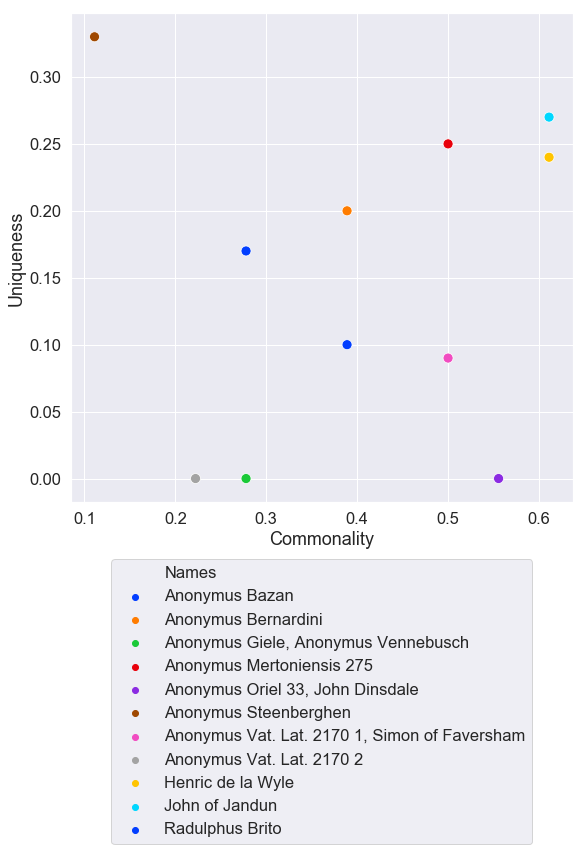

In [85]:
sns.set_context("notebook", font_scale=1.5)
f, ax = plt.subplots(1, figsize=(9, 9))
cmap = sns.color_palette('bright', len(scatter_df['Names']))
sns.scatterplot(x="Commonality", y="Uniqueness", hue="Names", data=scatter_df, s=100, palette=cmap)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=1)

In [86]:
f.savefig('../thesis/data/figures/science-commonality-uniqueness-scatter.pdf', bbox_inches="tight")
print_figure_inclusion(
    'process-commonality-uniqueness-scatter.pdf',
    caption='Scatter plot of uniqueness and commonality of commentators.',
    label='fig:science:scatter-uniquness-commonality')

\begin{figure}
\centering
\includegraphics[width=\linewidth]{data/figures/process-commonality-uniqueness-scatter.pdf}
\caption{Scatter plot of uniqueness and commonality of commentators.}
\label{fig:science:scatter-uniquness-commonality}
\end{figure}


## One-sided commonality

Now, let's look at the data in the more one sided perspective of how big a proportion of the material of one commentator is also to be found in the others (regardless of their shared sum of material). So this is the uni-directional, non-symmetric relation. 

This can be described by the metaphor or "outgoing" material, as it lists how much of the doctrines of the starting commentator (`name`) are present in any other commentator.

The hypothesis is that this can be used to investigate which commentators have material that is also present in a high proportion of the other commentators (regardless of how much unique material they might have).

In [87]:
def corpus_count_doctrines():
    """
    Return the number of doctrines in the corpus.
    """
    q = ("MATCH (corpus:Doctrine)--(i)--(:DissertationPart {chapter:4}) RETURN count(distinct corpus) as count ")
    return graph.run(q).evaluate()


corpus_count = corpus_count_doctrines()

In [88]:
distributions = graph.run("match (a:Author)--(:Text)--(:Question)--(i:Instance)--(d:Doctrine) "
                          "WHERE (i)--(:DissertationPart {chapter:4}) "
                          "return count(distinct d) as cnt, a.name order by cnt desc").to_data_frame()
distributions.describe()

,cnt
count,14.000000
mean,11.285714
std,4.065399
min,6.000000
25%,7.250000
50%,11.500000
75%,13.750000
max,18.000000


In [89]:
def outgoing_shared_material(name):
    """
    Return a dictionary of how big a proportion 
    of his doctrines the searched commentator 
    shares with all the others.
    """
    q = ("MATCH (a1:Author {name:'%s'})--(:Text)--(:Question)--(i1:Instance)--(shared:Doctrine)--(i2:Instance)--(:Question)--(:Text)--(a2:Author)  "
         "WHERE (a1) <> (a2) "
         "AND (i1)--(:DissertationPart {chapter:4}) AND (i2)--(:DissertationPart {chapter:4}) "
         "MATCH (a1)--(:Text)--(:Question)--(i3:Instance)--(own:Doctrine) " 
         "WHERE (i3)--(:DissertationPart {chapter:4}) "
         "RETURN a2.name as name, count(distinct shared) as shared, count(distinct own) as own " % name)
    return {r['name']:  r['shared'] / r['own'] for r in graph.run(q).data()}

unidir_single = outgoing_shared_material('Anonymus Vat. Lat. 2170 2')
unidir_single

{'Anonymus Vennebusch': 0.5,
 'Anonymus Bazan': 0.6666666666666666,
 'Anonymus Vat. Lat. 2170 1': 0.6666666666666666,
 'Radulphus Brito': 0.8333333333333334,
 'Anonymus Bernardini': 0.5,
 'Henric de la Wyle': 0.6666666666666666,
 'Anonymus Giele': 0.5,
 'Anonymus Mertoniensis 275': 0.6666666666666666,
 'Anonymus Steenberghen': 0.3333333333333333,
 'John of Jandun': 0.8333333333333334,
 'John Dinsdale': 0.6666666666666666,
 'Anonymus Oriel 33': 0.6666666666666666,
 'Simon of Faversham': 1.0}

This function normalizes the values against the proportion of doctrines of the author compared to the full corpus. This results in much lower values than the absolute proportions, but corrects for the inaccuracy that rises when the number of doctrines of the author is far from the corpus average.

### Uni-directional overlap in full matrix

This shows how big a proportion of the doctrines of one commentator are also to be found in each of the others. 

This is not a symmetrical relation. 

This will show much much of the material of the column commnentator (X) is present in the others (Y). This only shows how big a proportion of the material (X) is also found in each of the others (Y). It thus does not show how close the two are to each other but merely how close the X is to Y.

Now let's try to build a matrix of those values for all the commentators. By default each column (X) will contain the array of results from the above function. 


In [90]:
uni_rel = build_matrix(author_names, docfunc=outgoing_shared_material)
matrix = pd.DataFrame(uni_rel, index=author_names)
matrix

,Anonymus Bazan,Anonymus Bernardini,Anonymus Giele,Anonymus Mertoniensis 275,Anonymus Oriel 33,Anonymus Steenberghen,Anonymus Vat. Lat. 2170 1,Anonymus Vat. Lat. 2170 2,Anonymus Vennebusch,Henric de la Wyle,John Dinsdale,John of Jandun,Radulphus Brito,Simon of Faversham
Name,,,,,,,,,,,,,,
Anonymus Bazan,0.000000,0.363636,0.500000,0.294118,0.357143,0.285714,0.416667,0.666667,0.375,0.277778,0.384615,0.3125,0.545455,0.416667
Anonymus Bernardini,0.571429,0.000000,0.666667,0.529412,0.500000,0.142857,0.416667,0.500000,0.500,0.222222,0.538462,0.2500,0.454545,0.416667
Anonymus Giele,0.428571,0.363636,0.000000,0.235294,0.285714,0.142857,0.416667,0.500000,0.500,0.222222,0.307692,0.3750,0.363636,0.500000
Anonymus Mertoniensis 275,0.714286,0.818182,0.666667,0.000000,0.714286,0.285714,0.500000,0.666667,0.625,0.333333,0.692308,0.3125,0.545455,0.583333
Anonymus Oriel 33,0.714286,0.636364,0.666667,0.588235,0.000000,0.285714,0.416667,0.666667,0.500,0.555556,1.000000,0.4375,0.545455,0.500000
Anonymus Steenberghen,0.285714,0.090909,0.166667,0.117647,0.142857,0.000000,0.333333,0.333333,0.125,0.111111,0.153846,0.1875,0.272727,0.166667
Anonymus Vat. Lat. 2170 1,0.714286,0.454545,0.833333,0.352941,0.357143,0.571429,0.000000,0.666667,0.625,0.333333,0.384615,0.5000,0.545455,0.583333
Anonymus Vat. Lat. 2170 2,0.571429,0.272727,0.500000,0.235294,0.285714,0.285714,0.333333,0.000000,0.375,0.222222,0.307692,0.3125,0.454545,0.500000
Anonymus Vennebusch,0.428571,0.363636,0.666667,0.294118,0.285714,0.142857,0.416667,0.500000,0.000,0.277778,0.307692,0.3125,0.454545,0.333333


As we use both the values of the columns and rows, we just copy those two transformations of the matrix into two variables.

The difference is the following: 
- The `columns` contains what can be thought of (inaccurately) as outgoing proportions. This will show how much of the material of the column commnentator (X) is present in the others (Y).
- The `rows` contains what can be thought of (inaccurately) as ingoing proportions. This will show how much of the material of the column commentator (X) that is identical with the total doctrines of the row commentator (Y).

In [91]:
cols = matrix
rows = matrix.T

#### Single author proportions

Now with this matrix we can get any of the columns to see the data on that commentator.

In [92]:
cols['John of Jandun'].sort_values(ascending=False)

Name
Simon of Faversham           0.5000
Henric de la Wyle            0.5000
Anonymus Vat. Lat. 2170 1    0.5000
Radulphus Brito              0.4375
John Dinsdale                0.4375
Anonymus Oriel 33            0.4375
Anonymus Giele               0.3750
Anonymus Vennebusch          0.3125
Anonymus Vat. Lat. 2170 2    0.3125
Anonymus Mertoniensis 275    0.3125
Anonymus Bazan               0.3125
Anonymus Bernardini          0.2500
Anonymus Steenberghen        0.1875
John of Jandun               0.0000
Name: John of Jandun, dtype: float64

This for example shows how big a proportion of Jandun's doctrines are also used by e.g. Brito, Bazan and Wyle (39%, 27%, and 23% as of this writing). 

#### Concentration factor

If we calculate the mean of each of those columns we get a single value for how strong a tendency there is for the doctrines of an author to also be present in other authors.

In other words, this is an indication of how big a proportion of the doctrines of each column commentator other commentators use. 

This means that reading the text of a commentator with a high concetration score, the reader is more likely to read doctrines that are also present in other texts.

In [93]:
concentration = cols.mean().sort_values(ascending=False).round(2)

In [94]:
concentration

Anonymus Giele               0.62
Anonymus Vat. Lat. 2170 2    0.61
Anonymus Bazan               0.58
Anonymus Vennebusch          0.46
Radulphus Brito              0.46
John Dinsdale                0.45
Simon of Faversham           0.45
Anonymus Oriel 33            0.42
Anonymus Vat. Lat. 2170 1    0.42
Anonymus Bernardini          0.40
John of Jandun               0.35
Anonymus Mertoniensis 275    0.33
Henric de la Wyle            0.30
Anonymus Steenberghen        0.28
dtype: float64

In [95]:
save_table(
    filename='../thesis/data/tables/science-mean-concentration.tex', 
    table=concentration.to_frame('Proportion').to_latex(),
    caption='Standardized mean concentration factors.',
    label='tab:science:mean-concentration-factor')

Printed the following table to ../thesis/data/tables/science-mean-concentration.tex:
\\begin{table}
\centering
\begin{tabular}{lr}
\toprule
{} &  Proportion \\
\midrule
Anonymus Giele            &        0.62 \\
Anonymus Vat. Lat. 2170 2 &        0.61 \\
Anonymus Bazan            &        0.58 \\
Anonymus Vennebusch       &        0.46 \\
Radulphus Brito           &        0.46 \\
John Dinsdale             &        0.45 \\
Simon of Faversham        &        0.45 \\
Anonymus Oriel 33         &        0.42 \\
Anonymus Vat. Lat. 2170 1 &        0.42 \\
Anonymus Bernardini       &        0.40 \\
John of Jandun            &        0.35 \\
Anonymus Mertoniensis 275 &        0.33 \\
Henric de la Wyle         &        0.30 \\
Anonymus Steenberghen     &        0.28 \\
\bottomrule
\end{tabular}
\caption{Standardized mean concentration factors.}
\label{tab:science:mean-concentration-factor}
\end{table}


Let's collect the two measurements into one and calculate an average.

In [98]:
exemplary = pd.DataFrame(popular_prop_df.T['Average'])
exemplary['Concentration'] = concentration
exemplary.columns = ['Common doctrines', 'Concentration']
exemplary['Average'] = (exemplary['Common doctrines'] + exemplary['Concentration']) / 2
exemplary = exemplary.sort_values(by='Average', ascending=False).round(2)
exemplary

,Common doctrines,Concentration,Average
Anonymus Giele,0.56,0.62,0.59
John Dinsdale,0.66,0.45,0.56
Anonymus Bazan,0.50,0.58,0.54
Simon of Faversham,0.62,0.45,0.54
Anonymus Oriel 33,0.63,0.42,0.53
Anonymus Vat. Lat. 2170 2,0.44,0.61,0.53
Anonymus Vat. Lat. 2170 1,0.62,0.42,0.52
John of Jandun,0.65,0.35,0.50
Radulphus Brito,0.51,0.46,0.49
Anonymus Bernardini,0.51,0.40,0.46


In [99]:
save_table(
    filename='../thesis/data/tables/science-central-commentators.tex', 
    table=exemplary.to_latex(),
    caption='Proportions of popular doctrines, concentration indices, and the averages.',
    label='tab:science:central-commentators')

Printed the following table to ../thesis/data/tables/science-central-commentators.tex:
\\begin{table}
\centering
\begin{tabular}{lrrr}
\toprule
{} &  Common doctrines &  Concentration &  Average \\
\midrule
Anonymus Giele            &              0.56 &           0.62 &     0.59 \\
John Dinsdale             &              0.66 &           0.45 &     0.56 \\
Anonymus Bazan            &              0.50 &           0.58 &     0.54 \\
Simon of Faversham        &              0.62 &           0.45 &     0.54 \\
Anonymus Oriel 33         &              0.63 &           0.42 &     0.53 \\
Anonymus Vat. Lat. 2170 2 &              0.44 &           0.61 &     0.53 \\
Anonymus Vat. Lat. 2170 1 &              0.62 &           0.42 &     0.52 \\
John of Jandun            &              0.65 &           0.35 &     0.50 \\
Radulphus Brito           &              0.51 &           0.46 &     0.49 \\
Anonymus Bernardini       &              0.51 &           0.40 &     0.46 \\
Anonymus Vennebusch    

### Who have high out-going overlap?

Now we can also take the max value of each of column in the recipiency matrix to reveal whether there are some commentators who have a very high out-going overlap, i.e. what the highest outgoing value this commentator has.

In [100]:
max_values_outgoing = pd.DataFrame(cols.max().sort_values(ascending=False), columns=['Value']).round(2)
col = {name: ', '.join(cols.index[cols[name] == cols[name].max()].tolist()) for name in cols.index}
max_values_outgoing['Commentator(s)'] = pd.Series(col)
max_values_outgoing

,Value,Commentator(s)
John Dinsdale,1.00,Anonymus Oriel 33
Anonymus Vat. Lat. 2170 2,1.00,Simon of Faversham
Anonymus Giele,1.00,"John of Jandun, Simon of Faversham"
Anonymus Oriel 33,0.93,John Dinsdale
Anonymus Bazan,0.86,Radulphus Brito
Anonymus Bernardini,0.82,Anonymus Mertoniensis 275
Simon of Faversham,0.67,John of Jandun
Anonymus Vat. Lat. 2170 1,0.67,John of Jandun
Radulphus Brito,0.64,"John of Jandun, Simon of Faversham"
Anonymus Vennebusch,0.62,"Anonymus Mertoniensis 275, Anonymus Vat. Lat. ..."


This may be interesting to give hints about possible inheritance or inspiration.